In [54]:
from glob import glob
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
matplotlib.style.use('ggplot')

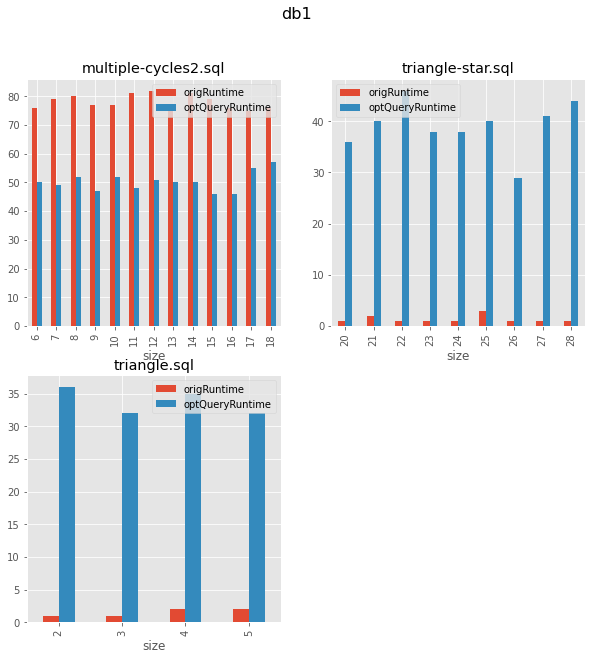

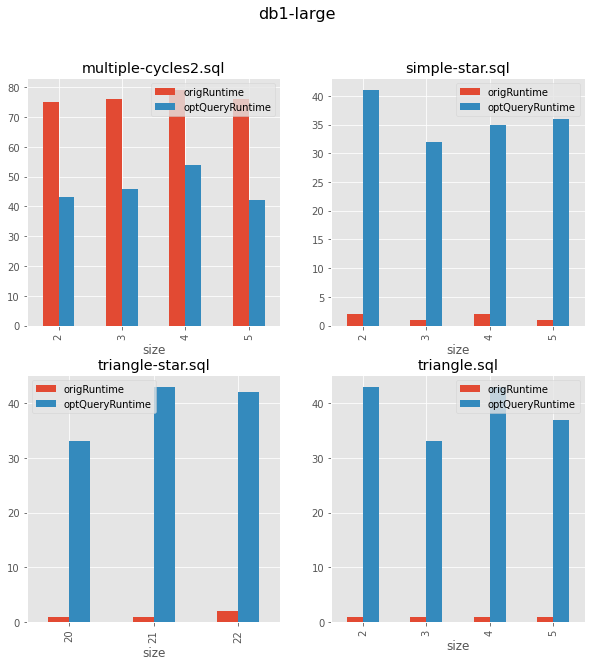

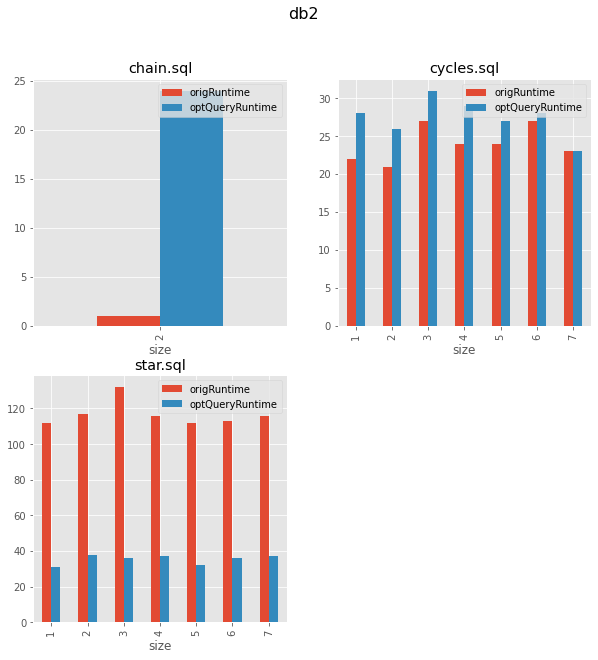

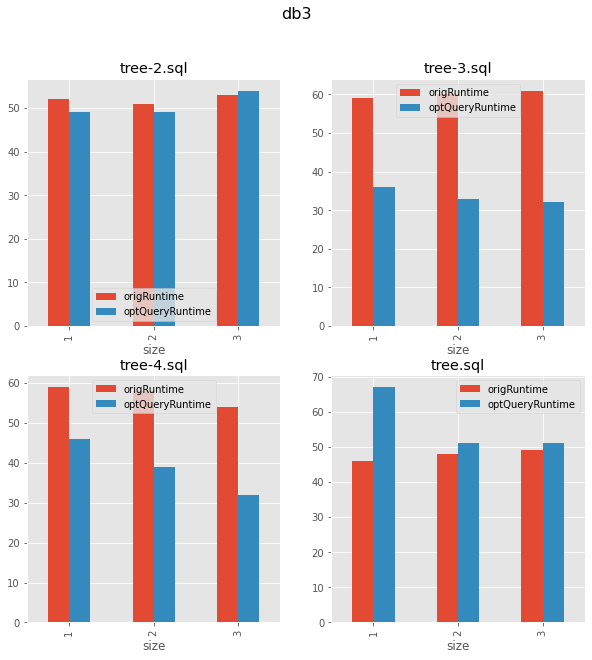

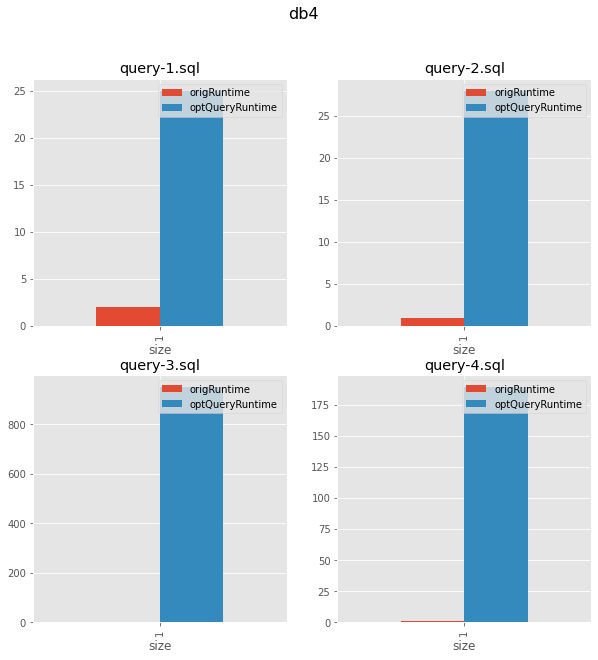

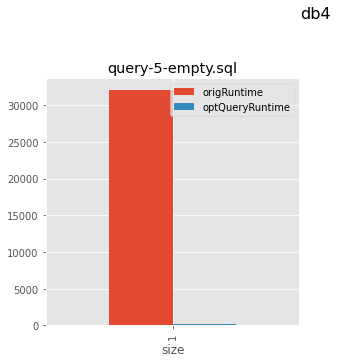

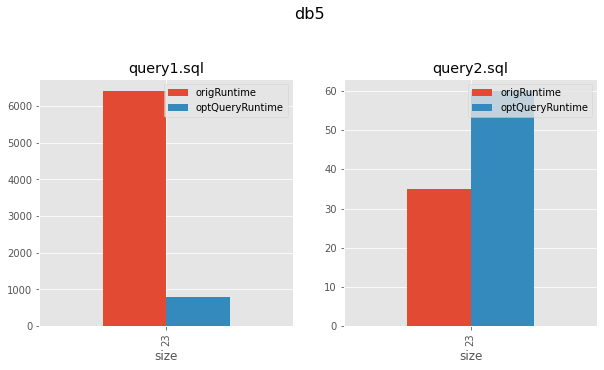

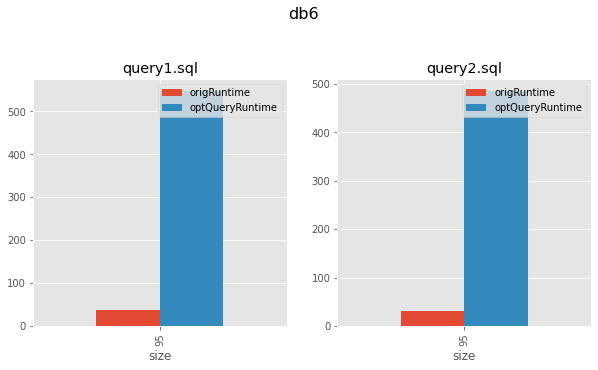

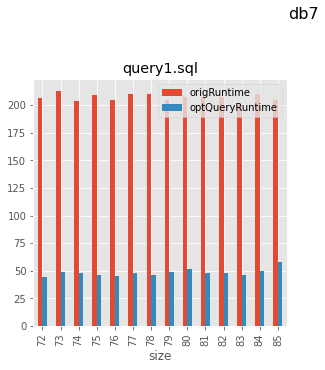

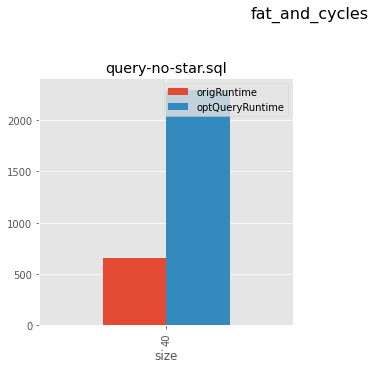

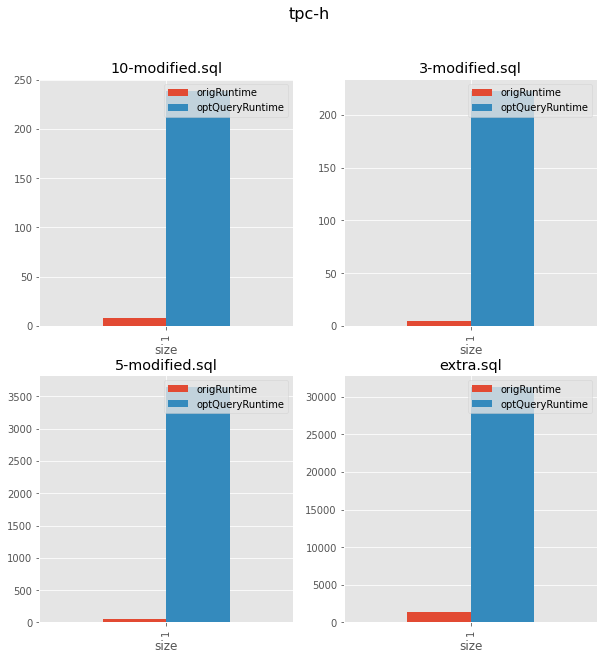

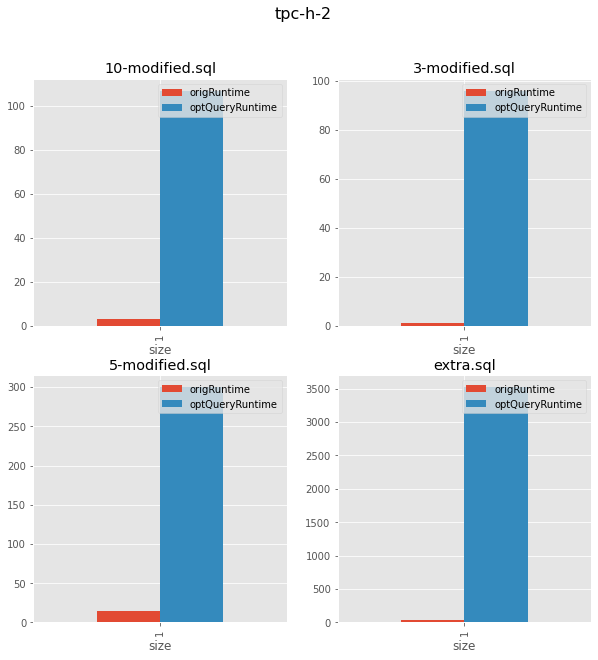

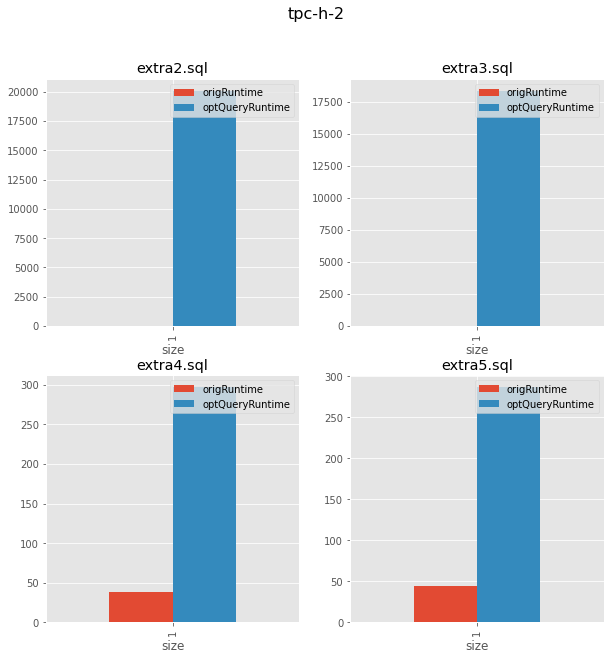

In [78]:
def visualize_db(db_name, db_df):
    fig = None
    #db_df.sort_values('query', inplace=True)
    for idx, (query_name, query_df) in enumerate(db_df.groupby('query')):
        if (idx % 4 == 0):
            fig = plt.figure(figsize=(10,10))
            fig.suptitle(db_name, fontsize=16)
        query_df.sort_values('size', inplace=True)
        ax = fig.add_subplot(2,2,(idx % 4) + 1)
        ax.set_title(query_name)
        query_df[['size', 'origRuntime', 'optQueryRuntime']].plot(kind='bar', x='size', ax=ax)


def visualize_summary(summary_file):
    df = pd.read_csv(summary_file)
    
    for db_name, db_df in df.groupby('db'):
        visualize_db(db_name, db_df)

def visualize(path):
    dbs = glob(path + '/*')
    summary_file = path + '/summary.csv'
    dbs.remove(summary_file)
    visualize_summary(summary_file) 
    
visualize("benchmark-results-2021-02-05-22:51:05")

In [19]:
visualize("benchmark-results-2021-02-05-22:51:05")